#### Aprendizaje Profundo - 1er Examen Parcial 
*Daniel Agraz Vallejo*

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

#### 1.**[25%]** 
Considere el modelo de red: 
$f(x;W,c,w,b) =w^{T}\; max\left \{0,W^{T}\cdot x + c  \right \}+ b$  

En donde, **W** es la matriz de pesos de la primera capa, **c** es el vector de sesgo de la primera capa, 𝒘 es el vector de pesos de la segunda capa y **b** es el sesgo de la segunda capa. La función de activación está definida por **g(z) = max{0,z}**. Podemos especificar la solución para el problema del clasificador XOR como:

$W = \begin{bmatrix} 1 & 1\\ 1 & 1 \end{bmatrix}, 
c = \begin{bmatrix}0 \\ -1 \end{bmatrix},
w = \begin{bmatrix}1 \\ -2 \end{bmatrix},
b = 0$

Sea **X** la matriz que contiene los cuatro puntos para el problema XOR en el espacio de entrada binario, con un ejemplo por fila:
$X =  \begin{bmatrix} 0 & 0\\ 0 & 1 \\ 1 & 0 \\ 1 & 1\end{bmatrix}$

Realizar la implementación utilizando funciones básicas de TensorFlow (evaluar la función $f(x;W,c,w,b)$  y especificar su salida. Todos los arreglos deberán ser **tf.constant()**.

In [2]:
def input_x() -> tuple:
    # Input binary values
    while True:
        try:
            input_x1 = int(input("Enter x1 bits: "), 2)
            input_x2 = int(input("Enter x2 bits: "), 2)
            break
        except ValueError:
            print("Invalid bit. Input only binary values")
    return input_x1, input_x2

def init_params() -> tuple:
    w1 = tf.constant([1, 1])
    w2 = tf.constant([1, -2])
    b1 = tf.constant([0, -1])
    b2 = tf.constant([0])
    return w1, w2, b1, b2

def forward_prop(w, x, b) -> tf.int32:
    return tf.reduce_sum(tf.multiply(w,x)) + b

def ReLU(z:np.int32) -> np.int32:
    return np.maximum(z, 0)

In [3]:
def main1():
    x1, x2 = input_x()
    w1, w2, b1, b2 = init_params()
    z11 = forward_prop(w1, tf.constant([x1, x2]), b1[0])
    z12 = forward_prop(w1, tf.constant([x1, x2]), b1[1])
    # print(f'Z1: {z11} | Z2: {z12}')

    # Activation 1st Layer
    a11, a21 = ReLU(z11), ReLU(z12)
    # print(f'A11: {a11}, A21: {a21}')

    # Activation 2nd Layer
    z21 = forward_prop(w2, tf.constant([a11, a21]), b2)[0]
    # print(f'Z21: {z21}')

    y = ReLU(z21) 

    print(f'x1: {x1}')
    print(f'x2: {x2}')
    print(f'y: {y}')

main1()

x1: 1
x2: 0
y: 1


2024-02-22 17:05:16.529000: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-22 17:05:16.529043: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-22 17:05:16.529068: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-22 17:05:16.529379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-22 17:05:16.529907: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### 2. **[25%]** 
Implementar el modelo de regresión lineal mediante la ecuación normal $\theta=(X^{T}X) − 1 \cdot (X^{T}y)$ utilizando funciones básicas de TensorFlow para el conjunto de datos **(data.csv)** el cual es una relación del producto interno bruto per cápita del país (GDP per capita) y la satisfacción de vida (Life satisfaction). Realizar:  

a. El diagrama de dispersión de los datos.  
b. La estimación de los parámetros del modelo.  
c. La estimación de satisfacción de vida para un producto interno bruto per cápita de 22,587.

In [4]:
# Load CSV file
data = pd.read_csv('datasets/data.csv')
data.head()

,GDP per capita,Life satisfaction
0,9054.914,6.0
1,9437.372,5.6
2,12239.894,4.9
3,12495.334,5.8
4,15991.736,6.1


In [5]:
X = tf.reshape(tf.convert_to_tensor(data['GDP per capita'].to_numpy()), [data.shape[0],1])
y = tf.reshape(tf.convert_to_tensor(data['Life satisfaction'].to_numpy()), [data.shape[0],1])
X, y

(<tf.Tensor: shape=(29, 1), dtype=float64, numpy=
 array([[ 9054.914],
        [ 9437.372],
        [12239.894],
        [12495.334],
        [15991.736],
        [17288.083],
        [18064.288],
        [19121.592],
        [20732.482],
        [25864.721],
        [27195.197],
        [29866.581],
        [32485.545],
        [35343.336],
        [37044.891],
        [37675.006],
        [40106.632],
        [40996.511],
        [41973.988],
        [43331.961],
        [43603.115],
        [43724.031],
        [43770.688],
        [49866.266],
        [50854.583],
        [50961.865],
        [51350.744],
        [52114.165],
        [55805.204]])>,
 <tf.Tensor: shape=(29, 1), dtype=float64, numpy=
 array([[6. ],
        [5.6],
        [4.9],
        [5.8],
        [6.1],
        [5.6],
        [4.8],
        [5.1],
        [5.7],
        [6.5],
        [5.8],
        [6. ],
        [5.9],
        [7.4],
        [7.3],
        [6.5],
        [6.9],
        [7. ],
        [7.4],
   

In [6]:
# Normal Equation Implementation
def NE(X: tf.Tensor, y: tf.Tensor) -> tf.Tensor:
    X_transpose = tf.transpose(X)
    return tf.matmul(tf.linalg.inv(tf.matmul(X_transpose, X)), tf.matmul(X_transpose,y))

# Ordinary Least Squares (OLS) Regression - 1 feature
def OLS(theta, x):
    return theta * x + 1

**a. Diagrama de Dispersión de Datos**

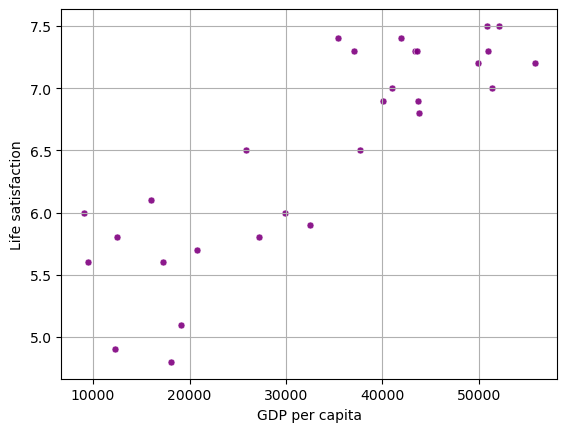

In [7]:
sns.scatterplot(
    x='GDP per capita', 
    y='Life satisfaction', 
    data=data, 
    markers='o',
    alpha=0.9,
    fc='purple', 
    s=25)
plt.grid()
plt.show()

**b. Estimación de los parámetros del modelo**

In [8]:
# Get theta coeficcient for OLS
theta = NE(X, y)

**c. Estimación de satisfacción de vida para un producto interno bruto per cápita de $22,587$**

In [9]:
# Get y prediction on a single observation
print(OLS(theta, 22587))

tf.Tensor([[4.87761743]], shape=(1, 1), dtype=float64)


#### 3. **[25%]** 
Implementar la operación lógica OR exclusiva (XOR). Utilizar solamente las operaciones básicas AND, OR, y NOT de TensorFlow. Las entradas (x1, x2) como la salida (z) deberán ser **tf.constant()** de tipo booleano.

In [10]:
def bool_input():
    def get_bool(prompt):
        while True:
            user_input = input(prompt).capitalize()
            if user_input == 'True':
                return True
            elif user_input == 'False':
                return False
            else:
                print("Enter True or False")

    bool1 = get_bool(f"Enter the x1 bool: ")
    bool2 = get_bool(f"Enter the x2 bool: ")
    return bool1, bool2

In [11]:
def main3():
    x1, x2 = bool_input()
    print(f'x1: {x1}'); print(f'x2: {x2}')
    x = tf.constant([x1, x2], dtype=tf.bool)
    z = tf.logical_and(tf.logical_not(tf.logical_and(x[0], x[1])), tf.logical_or(x[0],x[1]))
    return z

xor_result = main3()
print(f'y: {xor_result}')

x1: True
x2: False
y: True


#### 4. **[25%]** 
Implementar un perceptrón multicapa empleando el **MLPClassifier** de **scikit-learn** como clasificador para el conjunto de datos Iris, el cual contiene la longitud y el ancho del sépalo y pétalo (4 características) de 150 flores (muestras) de tres especies diferentes: Setosa (0), Versicolor (1) y Virginica (2).  

a. Imprimir la puntuación (score).  

b. Imprimir la predicción (clase) con el siguiente conjunto de prueba:

$\begin{bmatrix} 5.1 & 3.5 & 1.4 & 0.2\\ 
6.4 & 3.5 & 1.4 & 0.2\\ 
5.9 & 3.0 & 5.0 & 1.8 
\end{bmatrix}$

In [4]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.insert(4, 'class label', iris.target.reshape(-1,1))
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**a. Imprimir la puntuación (score)**

In [14]:
model = MLPClassifier(
    random_state=5,
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='constant',
    max_iter=500,
    verbose=False)
model.fit(X, y)
print("%0.3f" % model.score(X,y))

0.980


/Users/kekaz16/miniconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**b. Imprimir la predicción (clase) con el siguiente conjunto de prueba:**  

$\begin{bmatrix} 5.1 & 3.5 & 1.4 & 0.2\\ 
6.4 & 3.5 & 1.4 & 0.2\\ 
5.9 & 3.0 & 5.0 & 1.8 
\end{bmatrix}$

In [15]:
X_test = np.array([[5.1, 3.5, 1.4, 0.2],
                   [6.4, 3.5, 1.4, 0.2],
                   [5.9, 3.0, 5.0, 1.8]])

model.predict(X_test)

array([0, 0, 2])